In [24]:
import numpy as np 
import cv2 as cv
import tensorflow as tf 
from hashlib import md5
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Flatten, BatchNormalization, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix
import itertools
import os
import shutil
import random
import glob
import matplotlib.pyplot as plt 
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
project_folder = r"D:/GitHub/GML_Projektarbeit"



In [2]:
project_folder = r"D:/GitHub/GML_Projektarbeit"
os.chdir(project_folder)

all_animals = []

for dire in os.listdir(os.path.join(os.getcwd(), r"Data/Tierbilder_Dataset_Train_Eval/Images")):
    all_animals.append(dire)


os.chdir(r"./Data/")
if os.path.isdir(r"./Duplicate") is False:
    os.mkdir(r"./Train")
    os.mkdir(r"./Eval")
    os.mkdir(r"./Test")
    os.mkdir(r"./Duplicate")

for dire in os.listdir(os.getcwd()):
    if (dire == "Train" or dire == "Eval" or dire == "Test"):
        for animal in all_animals:
            if os.path.isdir(os.path.join(os.getcwd(), dire, animal)) is False:
                os.mkdir(os.path.join(os.getcwd(), dire, animal.split('-')[1]))

In [3]:
os.chdir(project_folder)
os.chdir(r"Data/Tierbilder_Dataset_Train_Eval/Images")

dst = r"D:/GitHub/GML_Projektarbeit/Data/Duplicate"
counter = 0
hashes = {}

for dire in all_animals:
    os.chdir(project_folder)
    os.chdir(os.path.join(r"Data/Tierbilder_Dataset_Train_Eval/Images", dire))
    for i, file in enumerate(os.listdir(os.getcwd())):
        img = open(file, 'rb')
        Hash = md5(img.read()).hexdigest()

        same_hash = hashes.get(Hash, [])
        same_hash.append(os.path.join(dire, file))
        hashes[Hash] = same_hash 
img.close()

os.chdir("D:\GitHub\GML_Projektarbeit\Data\Tierbilder_Dataset_Train_Eval\Images")

for i in hashes:
    for j in range(len(hashes[i])):
        if (j != 0):
            os.rename(os.path.join(os.getcwd(), hashes[i][j]), os.path.join(dst, hashes[i][j].split("\\")[1]))

In [4]:
os.chdir("D:\GitHub\GML_Projektarbeit\Data\Tierbilder_Dataset_Test\Images_Test\Images")

for i in os.listdir(os.getcwd()):
    move = False
    for j in all_animals:
        if (i.split('_')[0] == j.split('-')[1]):
            shutil.move(os.path.join(os.getcwd(), i), os.path.join(project_folder, r"Data", r"Test", j.split('-')[1]))
            move = True
    if (move == False):
        shutil.move(os.path.join(os.getcwd(), i), os.path.join(project_folder, r"Data", r"Test"))

os.chdir(project_folder)
shutil.rmtree(os.path.join(project_folder, "Data", "Tierbilder_Dataset_Test"))

In [5]:
os.chdir("D:\GitHub\GML_Projektarbeit\Data\Tierbilder_Dataset_Train_Eval\Images")
for i, animal in enumerate(all_animals):
    items_Train = len(os.listdir(os.path.join(animal))) * 0.8

    for i in range(round(items_Train)):
        shutil.move(os.path.join(os.getcwd(), animal, random.choice(os.listdir(os.path.join(animal)))), os.path.join(project_folder, r"Data", r"Train", animal.split('-')[1]))

    for i in os.listdir(os.path.join(animal)):
        shutil.move(os.path.join(os.getcwd(), animal, i), os.path.join(project_folder, r"Data", r"Eval", animal.split('-')[1]))

os.chdir(project_folder)
shutil.rmtree(os.path.join(project_folder, "Data", "Tierbilder_Dataset_Train_Eval"))

In [6]:
Train_path = r"Data/Train"
Eval_path = r"Data/Eval"
Test_path = r"Data/Test"

In [7]:
Train_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input)\
    .flow_from_directory(directory=Train_path, target_size=(224, 224), classes=['Butterfly', 'Cat', 'Chicken', 'Cow', 'Dog', 'Elephant', 'Horse', 'Sheep', 'Spider', 'Squirrel'], batch_size=10)
Eval_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input)\
    .flow_from_directory(directory=Eval_path, target_size=(224, 224), classes=['Butterfly', 'Cat', 'Chicken', 'Cow', 'Dog', 'Elephant', 'Horse', 'Sheep', 'Spider', 'Squirrel'], batch_size=10)
Test_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input)\
    .flow_from_directory(directory=Test_path, target_size=(224, 224), classes=['Butterfly', 'Cat', 'Chicken', 'Cow', 'Dog', 'Elephant', 'Horse', 'Sheep', 'Spider', 'Squirrel'], batch_size=10, shuffle=False)

Found 20943 images belonging to 10 classes.
Found 5236 images belonging to 10 classes.
Found 20 images belonging to 10 classes.


In [8]:
assert Train_batches.n == 20943
assert Eval_batches.n == 5236
assert Test_batches.n == 20
assert Train_batches.num_classes == Eval_batches.num_classes == Test_batches.num_classes == 10

In [9]:
imgs, labels = next(Train_batches)

In [10]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 10, figsize = (20,20))
    axes = axes.flatten()
    for img, ax in zip(images_arr,axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

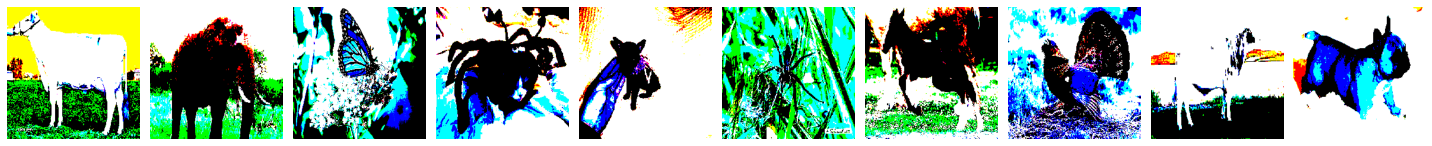

[[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


In [11]:
plotImages(imgs)
print(labels)

In [29]:
model = Sequential([
    Conv2D(filters = 32, kernel_size = (3, 3), activation = 'relu', padding = 'same', input_shape = (224, 224, 3)),\
    MaxPool2D(pool_size = (2, 2), strides = 2),\
    Conv2D(filters = 64, kernel_size = (3, 3), activation = 'relu', padding = 'same'),\
    MaxPool2D(pool_size = (2, 2), strides = 2),
    Flatten(),
    Dense(units = 10, activation = 'softmax'),
])

In [30]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 224, 224, 32)      896       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 112, 112, 32)      0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 112, 112, 64)      18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 56, 56, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 200704)            0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                2007050   
Total params: 2,026,442
Trainable params: 2,026,442
Non-trainable params: 0
____________________________________________

In [31]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [32]:
model.fit(x=Train_batches, validation_data=Eval_batches, epochs=10, verbose=2)

Epoch 1/10
2095/2095 - 758s - loss: 4.5147 - accuracy: 0.4080 - val_loss: 1.5404 - val_accuracy: 0.4977
Epoch 2/10
2095/2095 - 742s - loss: 0.4975 - accuracy: 0.8452 - val_loss: 1.8276 - val_accuracy: 0.5050
Epoch 3/10
2095/2095 - 753s - loss: 0.1137 - accuracy: 0.9698 - val_loss: 2.1745 - val_accuracy: 0.5097
Epoch 4/10
2095/2095 - 702s - loss: 0.0828 - accuracy: 0.9769 - val_loss: 2.5764 - val_accuracy: 0.4941
Epoch 5/10
2095/2095 - 701s - loss: 0.0701 - accuracy: 0.9805 - val_loss: 2.6034 - val_accuracy: 0.5053
Epoch 6/10
2095/2095 - 701s - loss: 0.0573 - accuracy: 0.9829 - val_loss: 3.2648 - val_accuracy: 0.4981
Epoch 7/10
2095/2095 - 699s - loss: 0.0377 - accuracy: 0.9890 - val_loss: 3.2743 - val_accuracy: 0.4903
Epoch 8/10
2095/2095 - 702s - loss: 0.0290 - accuracy: 0.9922 - val_loss: 3.7772 - val_accuracy: 0.4773
Epoch 9/10
2095/2095 - 730s - loss: 0.0249 - accuracy: 0.9927 - val_loss: 3.4864 - val_accuracy: 0.4968
Epoch 10/10
2095/2095 - 785s - loss: 0.0254 - accuracy: 0.9928 -